In [1]:
# Cell 1 — create sample CSV (optional)
import pandas as pd
sample = pd.DataFrame({
    'Date': pd.date_range('2025-01-01', periods=6, freq='M'),
    'Product': ['Apple','Banana','Apple','Carrot','Banana','Carrot'],
    'Region': ['North','South','East','West','North','East'],
    'Quantity': [10, 5, 7, 8, 6, 9],
    'UnitPrice': [100, 150, 100, 200, 150, 200]
})
sample['Sales'] = sample['Quantity'] * sample['UnitPrice']
sample.to_csv('sales_data.csv', index=False)
print("Created sales_data.csv — you can open it or replace with your CSV")
sample.head()

Created sales_data.csv — you can open it or replace with your CSV


/tmp/ipython-input-1786819384.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range('2025-01-01', periods=6, freq='M'),


,Date,Product,Region,Quantity,UnitPrice,Sales
0,2025-01-31,Apple,North,10,100,1000
1,2025-02-28,Banana,South,5,150,750
2,2025-03-31,Apple,East,7,100,700
3,2025-04-30,Carrot,West,8,200,1600
4,2025-05-31,Banana,North,6,150,900


In [2]:
# Cell 2 — imports & settings
import os
import pandas as pd
import matplotlib.pyplot as plt

# Make plots show in the notebook
%matplotlib inline

# Helpful pandas display settings
pd.options.display.max_columns = 50
pd.options.display.float_format = '{:,.2f}'.format

# Show current working dir (helps debug file paths)
os.getcwd()

'/content'

In [3]:
# Cell 3 — load CSV
df = pd.read_csv('sales_data.csv', parse_dates=['Date'], encoding='utf-8', dayfirst=False)
df.head()

,Date,Product,Region,Quantity,UnitPrice,Sales
0,2025-01-31,Apple,North,10,100,1000
1,2025-02-28,Banana,South,5,150,750
2,2025-03-31,Apple,East,7,100,700
3,2025-04-30,Carrot,West,8,200,1600
4,2025-05-31,Banana,North,6,150,900


In [4]:
# Cell 4 — inspect
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6 non-null      datetime64[ns]
 1   Product    6 non-null      object        
 2   Region     6 non-null      object        
 3   Quantity   6 non-null      int64         
 4   UnitPrice  6 non-null      int64         
 5   Sales      6 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 420.0+ bytes


,0
Date,0
Product,0
Region,0
Quantity,0
UnitPrice,0
Sales,0


In [5]:
# Cell 5 — compute Sales if not present
if 'Sales' not in df.columns:
    df['Sales'] = df['Quantity'] * df['UnitPrice']

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Quick look
df.head()

,Date,Product,Region,Quantity,UnitPrice,Sales
0,2025-01-31,Apple,North,10,100,1000
1,2025-02-28,Banana,South,5,150,750
2,2025-03-31,Apple,East,7,100,700
3,2025-04-30,Carrot,West,8,200,1600
4,2025-05-31,Banana,North,6,150,900


In [6]:
# Cell 6 — total sales per product
sales_per_product = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
sales_per_product


,Sales
Product,
Carrot,3400
Apple,1700
Banana,1650


In [7]:
# Cell 7 — total sales per region
sales_per_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sales_per_region

,Sales
Region,
East,2500
North,1900
West,1600
South,750


In [8]:
# Cell 8 — monthly sales trend (2 ways)
# Method A: resample (set Date index)
monthly_resample = df.set_index('Date').resample('M')['Sales'].sum()
monthly_resample

# Method B: extract month label and group
df['Month'] = df['Date'].dt.to_period('M').astype(str)
monthly_group = df.groupby('Month')['Sales'].sum()
monthly_group

/tmp/ipython-input-3516390530.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resample = df.set_index('Date').resample('M')['Sales'].sum()


,Sales
Month,
2025-01,1000
2025-02,750
2025-03,700
2025-04,1600
2025-05,900
2025-06,1800


In [9]:
# Cell 9 — sales by region and product (wide table)
sales_region_product = df.groupby(['Region','Product'])['Sales'].sum().unstack(fill_value=0)
sales_region_product

Product,Apple,Banana,Carrot
Region,,,
East,700,0,1800
North,1000,900,0
South,0,750,0
West,0,0,1600


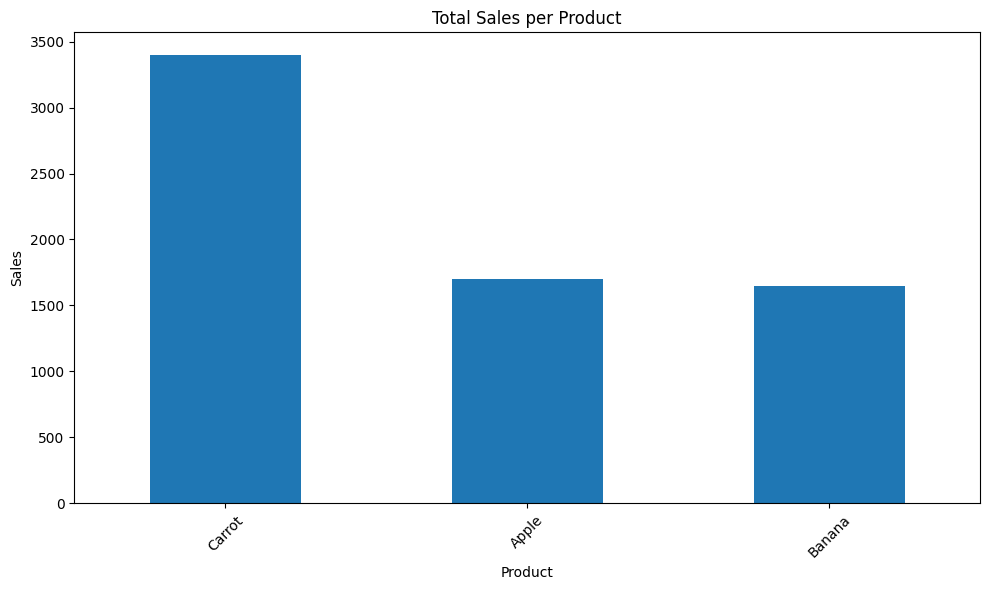

In [10]:
# Cell 10 — bar chart: sales per product
ax = sales_per_product.plot(kind='bar', figsize=(10,6))
ax.set_title('Total Sales per Product')
ax.set_xlabel('Product')
ax.set_ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

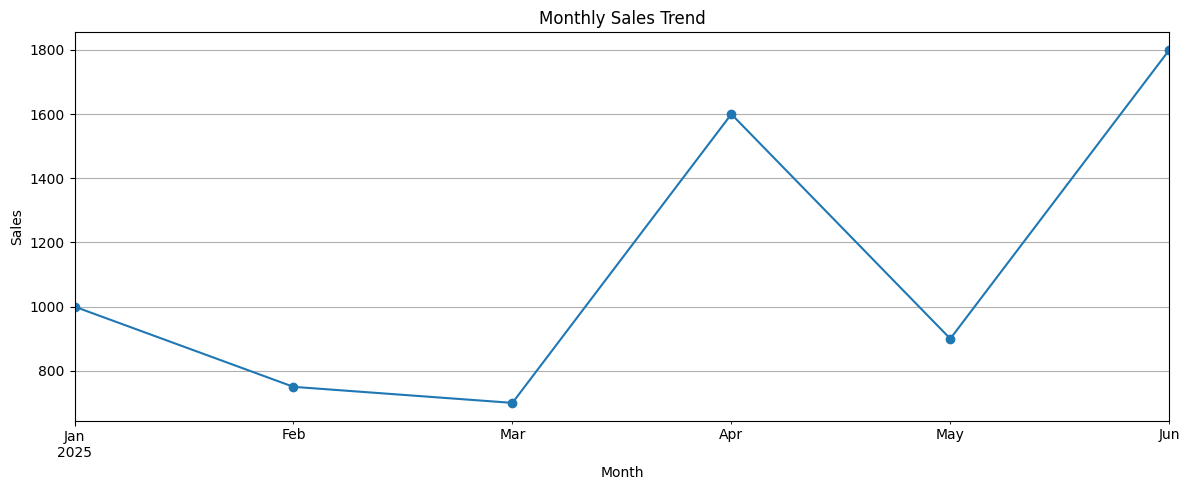

In [11]:
# Cell 11 — line chart: monthly sales trend
ax = monthly_resample.plot(kind='line', marker='o', figsize=(12,5))
ax.set_title('Monthly Sales Trend')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

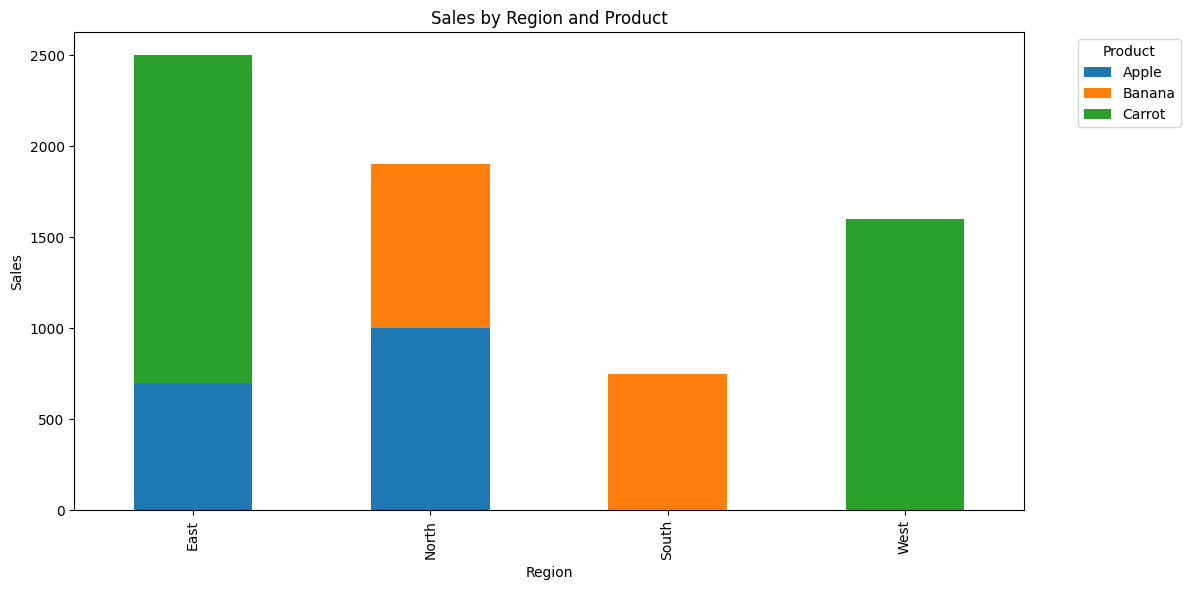

In [12]:
ax = sales_region_product.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Sales by Region and Product')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.legend(title='Product', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

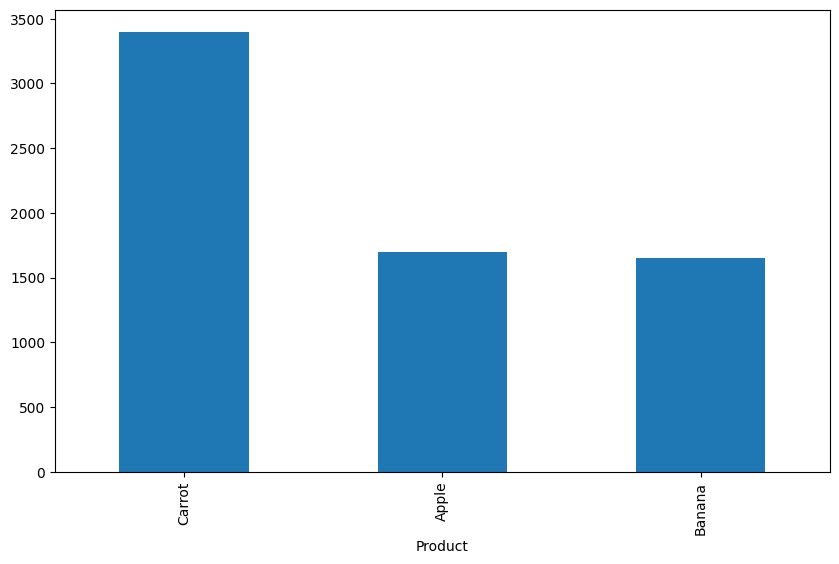

In [13]:
# Save a chart to file
fig = sales_per_product.plot(kind='bar', figsize=(10,6)).get_figure()
fig.savefig('sales_per_product.png', dpi=150, bbox_inches='tight')

# Save grouped data to CSV
sales_per_product.to_csv('sales_per_product_summary.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')